In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,98036.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,21.0,124511187,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,5.306105e+10
6,KM8S6DA23N,Kitsap,Poulsbo,WA,98370.0,2022,HYUNDAI,SANTA FE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,31.0,0.0,23.0,212217764,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
7,7FCTGAAA1P,Snohomish,Arlington,WA,98223.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,252414039,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC,5.306105e+10
8,5YJYGDEE9L,King,Kent,WA,98031.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,47.0,112668510,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9,1N4AZ0CP2F,King,Kirkland,WA,98034.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,45.0,109765204,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,1
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.drop(df[(df['Model'].isna()) | (df['Model']==0.0)].index, inplace = True)

In [ ]:
df.dropna(subset = ['Postal Code'], inplace = True)

In [ ]:
df.drop(df[(df['Vehicle Location'].isna()) | (df['Model']==0.0)].index, inplace = True)

In [ ]:
df['Model Year'] = pd.to_datetime(df['Model Year'], errors = 'coerce')

In [ ]:
df.drop(df[(df['Legislative District'].isna()) | (df['Model']==0.0)].index, inplace = True)

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.shape

(204991, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204991 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   VIN (1-10)                                         204991 non-null  object        
 1   County                                             204991 non-null  object        
 2   City                                               204991 non-null  object        
 3   State                                              204991 non-null  object        
 4   Postal Code                                        204991 non-null  float64       
 5   Model Year                                         204991 non-null  datetime64[ns]
 6   Make                                               204991 non-null  object        
 7   Model                                              204991 non-null  object        
 8   Electric 

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,204991.000000,204991,204983.000000,204983.000000,204991.000000,2.049910e+05,2.049910e+05
mean,98264.521116,1970-01-01 00:00:00.000002020,52.149608,921.383212,28.970994,2.277347e+08,5.303995e+10
min,98001.000000,1970-01-01 00:00:00.000001997,0.000000,0.000000,1.000000,4.469000e+03,5.300195e+10
25%,98052.000000,1970-01-01 00:00:00.000002019,0.000000,0.000000,17.000000,1.935673e+08,5.303301e+10
50%,98125.000000,1970-01-01 00:00:00.000002022,0.000000,0.000000,33.000000,2.382667e+08,5.303303e+10
75%,98373.000000,1970-01-01 00:00:00.000002023,48.000000,0.000000,42.000000,2.618801e+08,5.305307e+10
max,99403.000000,1970-01-01 00:00:00.000002025,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10
std,306.561278,NaN,88.060331,7755.840759,14.910123,7.206356e+07,1.633374e+07


In [ ]:
import plotly.express as px

# Assuming 'County' and 'VIN' columns for vehicle counts
county_ev_counts = df['County'].value_counts().head(20)  # Top 20 counties for more data

# Create a DataFrame for Plotly
county_ev_df = county_ev_counts.reset_index()
county_ev_df.columns = ['County', 'Number of Electric Vehicles']

# Plot using Plotly
fig = px.bar(county_ev_df, x='County', y='Number of Electric Vehicles',
             title='Top 20 Counties with the Most Electric Vehicles',
             labels={'County': 'County', 'Number of Electric Vehicles': 'Number of Electric Vehicles'})
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'ev_data' is your DataFrame with 'Legislative District', 'VIN (1-10)', and 'Electric Vehicle Type' columns
# Group and count by legislative district and electric vehicle type
district_type_counts = df.groupby(['Legislative District', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Create a DataFrame for Plotly, converting the multi-index DataFrame back to a regular DataFrame
district_type_df = district_type_counts.reset_index()

# Plot using Plotly
fig = px.bar(district_type_df, x='Legislative District', y=district_type_df.columns[1:],
             title='Distribution of Electric Vehicle Types Across Legislative Districts by VIN Segments',
             labels={'value': 'Number of Vehicles', 'variable': 'Electric Vehicle Type'},
             template='plotly_white')

# Make the bars stacked
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(title_text='Legislative District')
fig.update_yaxes(title_text='Number of Vehicles')
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'district_ev_counts' is already grouped and counted by 'Legislative District'
district_ev_counts = df.groupby('Legislative District').size()
district_ev_df = district_ev_counts.reset_index()
district_ev_df.columns = ['Legislative District', 'Number of Electric Vehicles']

# Create interactive line chart using Plotly
fig = px.line(district_ev_df, x='Legislative District', y='Number of Electric Vehicles',
              title='Electric Vehicles in Legislative Districts',
              markers=True,  # To add markers as in your Matplotlib code
              labels={'Legislative District': 'Legislative District', 'Number of Electric Vehicles': 'Number of Electric Vehicles'})

# Adding grid lines
fig.update_layout(xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))

fig.show()


In [ ]:
!pip install squarify

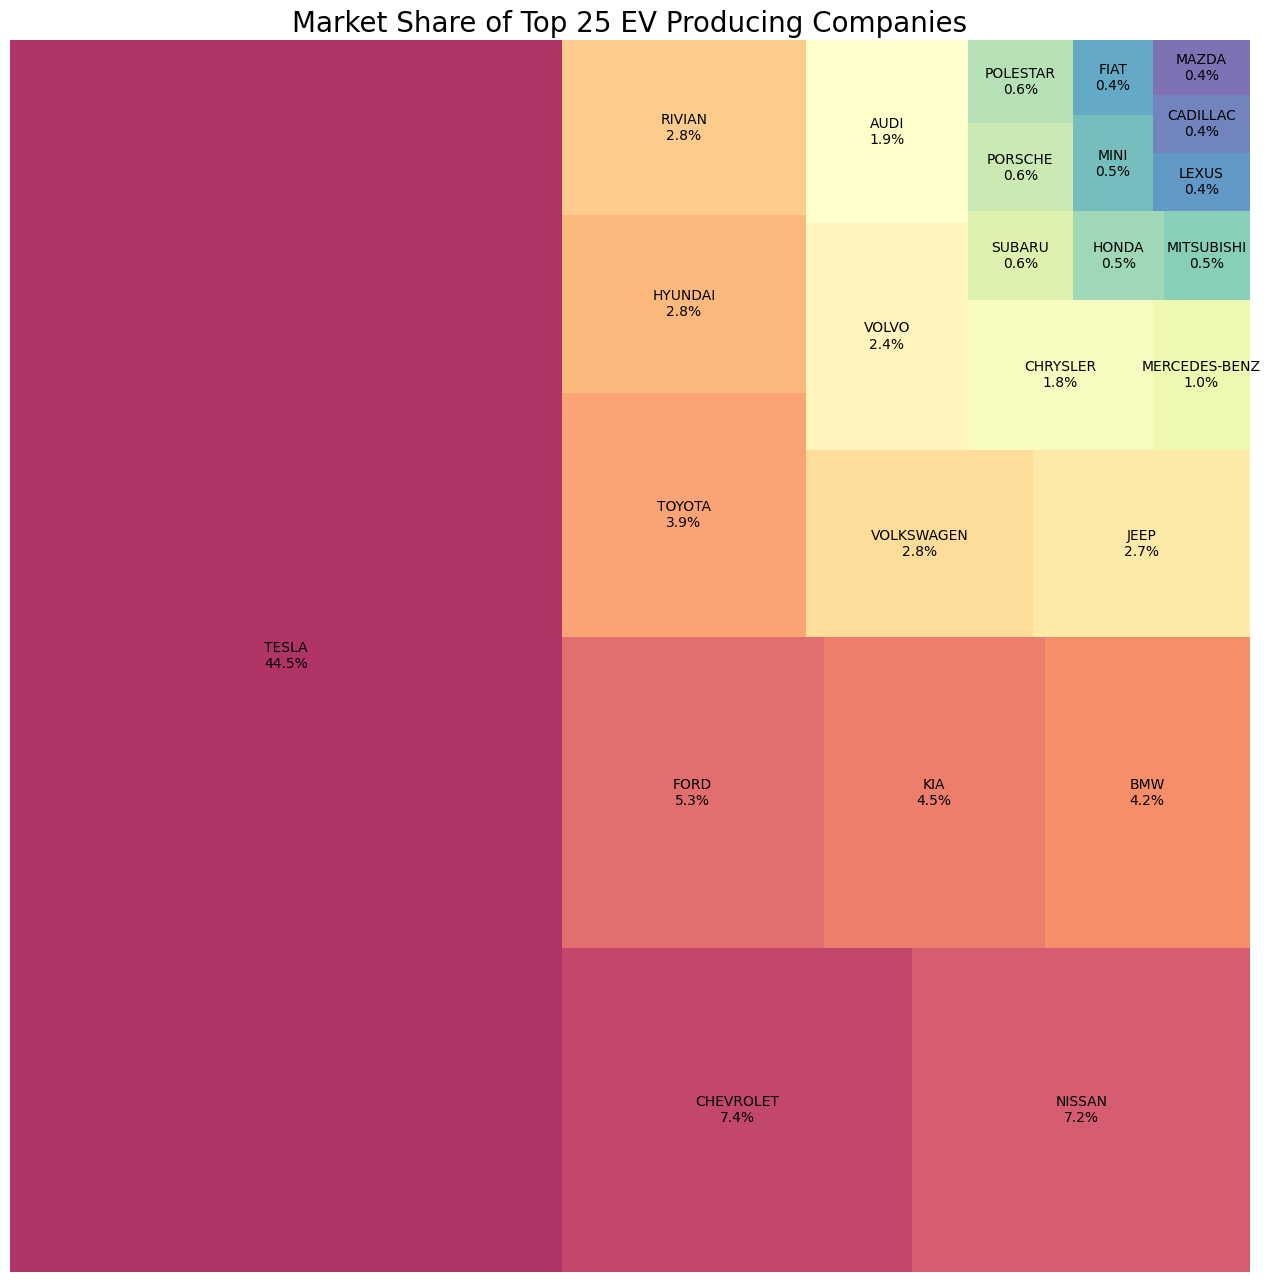

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify  # This is the library for treemap
import numpy as np

# Assuming 'df' is your DataFrame and it contains a column 'Make'
# Count the occurrences of each 'Make' in the DataFrame
make_counts = df['Make'].value_counts()

# Focus only on the top 10 makes
top_10_makes = make_counts.head(25)

# Normalize these counts to get market share percentages
market_shares = top_10_makes / top_10_makes.sum() * 100

# Preparing labels for the treemap with percentage values
labels = [f"{make}\n{share:.1f}%" for make, share in market_shares.items()]

# Colors for the treemap blocks
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Plotting with increased plot size
plt.figure(figsize=(16, 16))  # Adjusted to a reasonable size for clarity
squarify.plot(sizes=market_shares, label=labels, color=colors, alpha=0.8)
plt.title('Market Share of Top 25 EV Producing Companies', fontsize=20)
plt.axis('off')  # Treemaps do not require axes
plt.show()

